In [4]:
import numpy as np
import sympy
import random
import math
import matplotlib.pyplot as plt
from sympy import *
import scipy
from scipy.stats import chi2  

theta0 = 0 

alpha = 0.1
repeat = 10000
theta_l = -0.2
theta_u = 0.2
noiselist = np.linspace(1, 10, 10)
cov = []
for t in range(10):
    idx1 = 0
    idx2 = 0
    idx3 = 0
    noise = noiselist[t]
#     noise = sqrt(noise)
    for trial in range(repeat):
        x1 = np.random.normal(0)*noise + theta0
        x2 = np.random.normal(0)*noise + theta0 + x1
        y_pred_l = float(2* x1 - sqrt(2)* noise*scipy.stats.norm.ppf( 1-alpha/2,0,1))
        y_pred_u = float(2*x1 - sqrt(2)*noise*scipy.stats.norm.ppf( alpha/2,0,1))
        if (x2>y_pred_l)&(x2<y_pred_u):
            idx1 += 1
        if (x2 - x1 -  x1 <  noise*scipy.stats.norm.ppf(1-alpha/2,0,1))&(x2 - x1 -  x1 >  noise*scipy.stats.norm.ppf( alpha/2,0,1)):
            idx2 += 1
        if (x2 - x1 -  theta_u < noise* scipy.stats.norm.ppf(1-alpha/2,0,1))&(x2 - x1 -  theta_l >  noise*scipy.stats.norm.ppf( alpha/2,0,1)):
            idx3 += 1
        if trial%500==0:
            print(trial)
    print(idx1/repeat,idx2/repeat,idx3/repeat)
    cov.append([idx1/repeat,idx2/repeat,idx3/repeat])

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
0.9013 0.7536 0.9316
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
0.8984 0.7554 0.916
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
0.8975 0.752 0.9084
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
0.9031 0.7618 0.9118
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
0.9006 0.7526 0.9075
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
0.8996 0.7538 0.9067
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
0.8995 0.7506 0.9009
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
0.9006 0.7539 0.9019
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500


In [5]:
s1 =  np.linspace(1,10,10)
s2 =  np.linspace(1,10,10)
s3 =  np.linspace(1,10,10)
for i in range(10):
    s1[i] = cov[i][0]
for i in range(10):
    s2[i] = cov[i][1]
for i in range(10):
    s3[i] = cov[i][2]

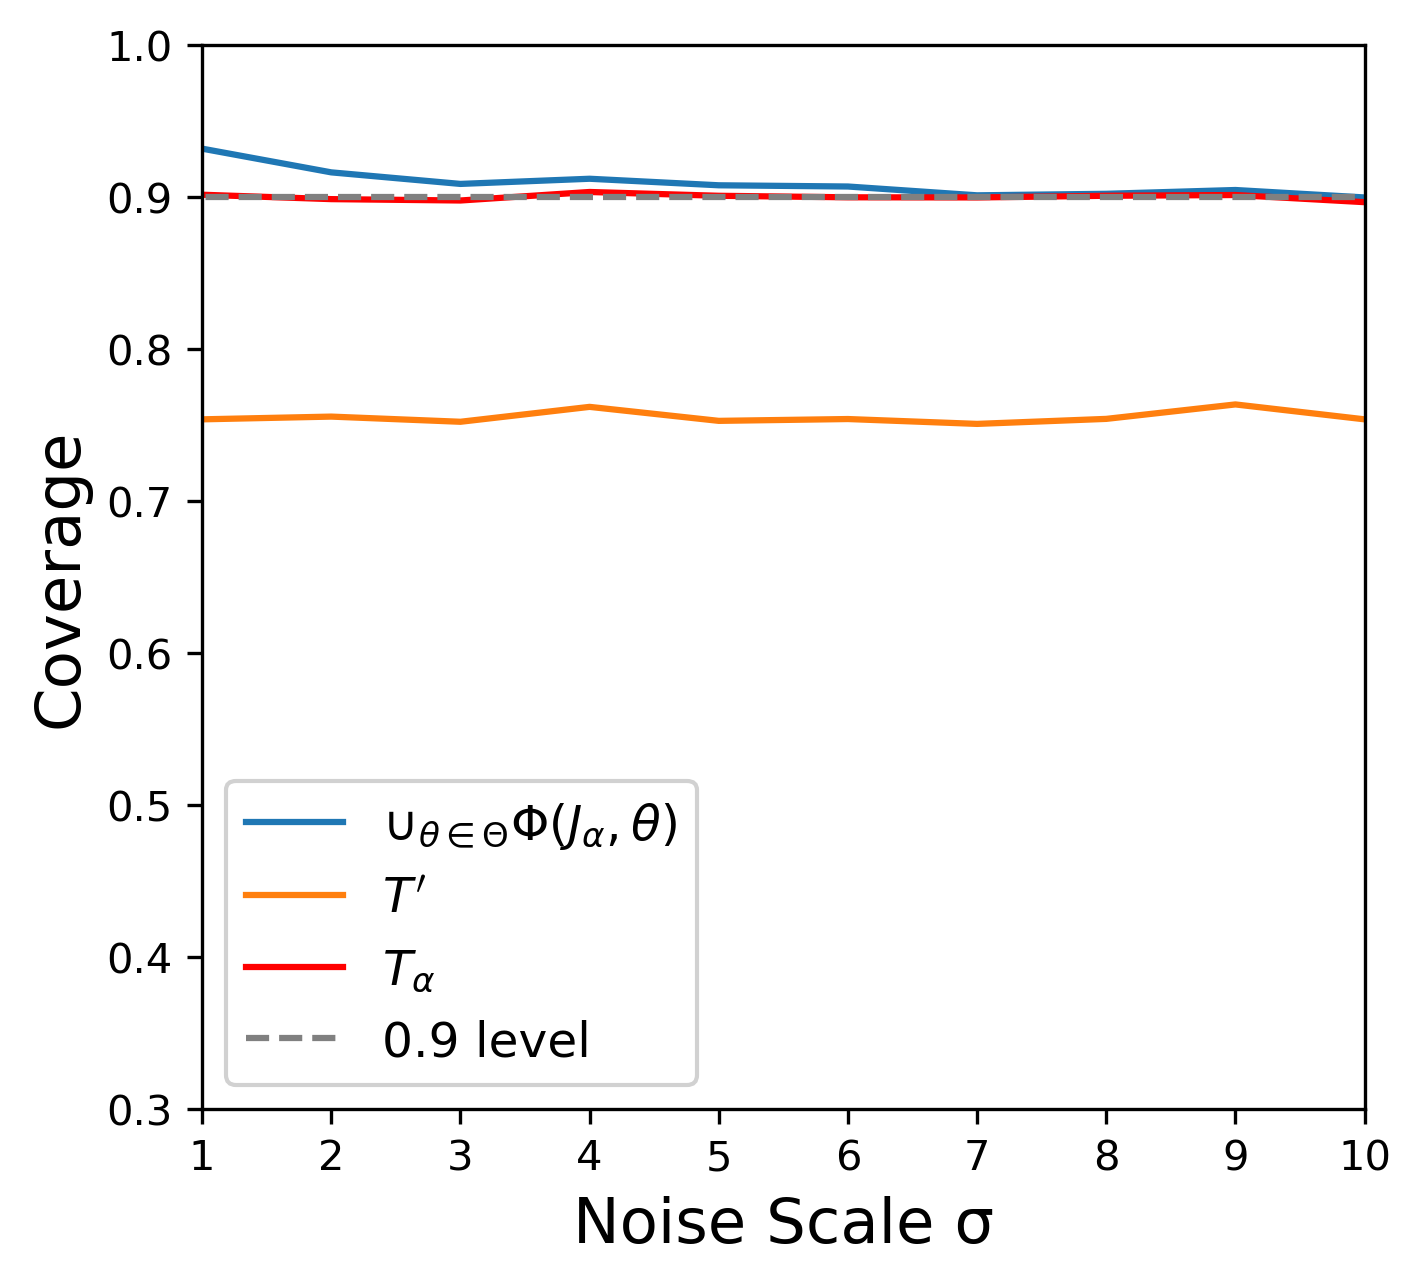

In [6]:
fig, ax = plt.subplots(dpi=300,figsize=(5,4.7))

ax.plot(noiselist, s3, linewidth=1.5,label='$\cup_{θ \in Θ} \Phi(J_{α},θ)$',color='#1f77b4')
ax.plot(noiselist, s2, linewidth=1.5,label='$T\'$',color='#ff7f0e')
ax.plot(noiselist, s1, linewidth=1.5,label='$T_{α}$',color='r')

plt.hlines(0.9, 0, 10, linestyles='dashed',color='grey',label='0.9 level')

plt.xlabel('Noise Scale σ',size=15)
plt.ylabel('Coverage',size=15)

plt.xlim(1,10)
plt.ylim(0.3,1)
plt.legend(loc='lower left',fontsize=11.7,framealpha=0.9)
plt.savefig('toy_pred_cov.png',bbox_inches = 'tight')
plt.show()

In [8]:
import numpy as np
import sympy
import random
import math
import matplotlib.pyplot as plt
from sympy import *
import scipy
from scipy.stats import chi2  

theta_l = -0.2
theta_u = 0.2
theta_min = theta_l
theta_max = theta_u
grid_num = 101

thetagrid = np.linspace(theta_min, theta_max, grid_num)
alpha = 0.1

y_u = np.linspace(theta_min, theta_max, grid_num)
y_l = np.linspace(theta_min, theta_max, grid_num)

# x1 = np.random.normal(0)
# print(x1)
x1 = 0.3

y_u = 2*x1+scipy.stats.norm.ppf(1-alpha/2,0,1)
y_l = 2*x1+scipy.stats.norm.ppf(alpha/2,0,1)


In [9]:
y_u1 = np.linspace(theta_min, theta_max, grid_num)
y_l1 = np.linspace(theta_min, theta_max, grid_num)

for i in range(len(thetagrid)):
    y_u1[i] = np.dot(1,thetagrid[i]) + scipy.stats.norm.ppf(1-alpha/2,0,1) + x1
    y_l1[i] = np.dot(1,thetagrid[i]) + scipy.stats.norm.ppf(alpha/2,0,1) + x1

In [10]:
y_pred_l = float(2* x1 - sqrt(2)* scipy.stats.norm.ppf(1-alpha/2,0,1))
y_pred_u = float(2*x1 - sqrt(2)*scipy.stats.norm.ppf(alpha/2,0,1))
print(theta_l,theta_u)
print(y_pred_l,y_pred_u)

-0.2 0.2
-1.7261743073533475 2.926174307353348


In [11]:
y_proj_u  = x1+theta_u + scipy.stats.norm.ppf(1-alpha/2,0,1)
y_proj_l  = x1+theta_l + scipy.stats.norm.ppf(alpha/2,0,1)

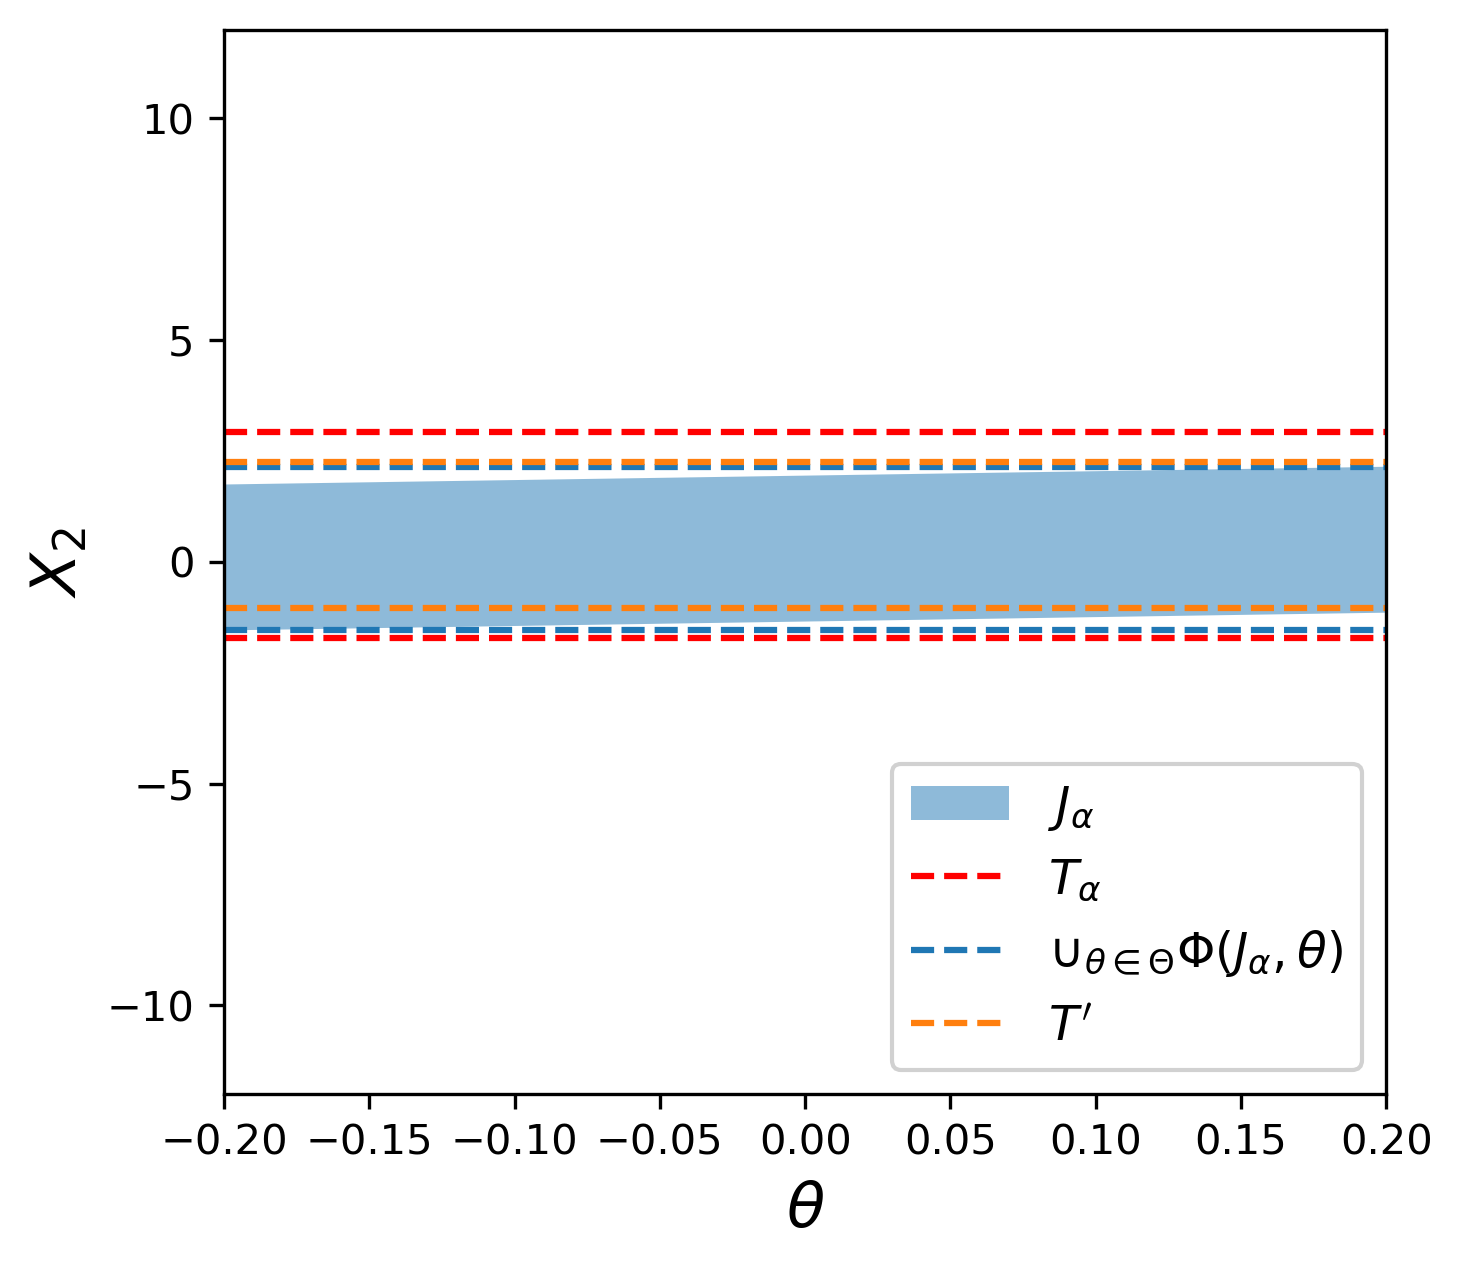

In [12]:
fig, ax = plt.subplots(dpi=300,figsize=(5,4.7))

ax.fill_between(thetagrid, y_l1, y_u1, alpha=.5, linewidth=0,label='$J_{α}$')

vline_indx = [theta_l, theta_u]
hline_indx = [y_pred_l, y_pred_u]
hline_indx1 = [y_proj_l, y_proj_u]
hline_indx2 = [y_l, y_u]

ymin = -12
ymax = 12
 
plt.hlines(hline_indx, theta_l,theta_u,colors='r',linestyles='dashed',label='$T_{α}$')

plt.hlines(hline_indx1, theta_l,theta_u, colors='#1f77b4', linestyles='dashed', label = '$\cup_{θ \in Θ} \Phi(J_{α},θ)$')
plt.hlines(hline_indx2, theta_l,theta_u, colors='#ff7f0e',linestyles='dashed',label='$T\'$')

plt.ylabel('$X_2$',size=15)
plt.xlabel('$θ$',size=15)
plt.xlim(theta_l,theta_u)
plt.ylim(ymin,ymax)
plt.legend(loc='lower right',fontsize=11.7,framealpha=0.9)
plt.savefig('toy_pred.png',bbox_inches = 'tight')
plt.show()